In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path= 'input/meeting_survey.xlsx'
df= pd.read_excel(path)

df= (df
    .set_index('Meeting frequency')
    .stack()
    .to_frame()
    .reset_index()
    .rename(columns={'level_1': 'hue', 0: 'value'})
    .replace({"Before Covid": "Good ol' days"})
)

df

,Meeting frequency,hue,value
0,As needed: no regular schedule,Good ol' days,14
1,As needed: no regular schedule,During Covid,13
2,Once per month or less,Good ol' days,7
3,Once per month or less,During Covid,2
4,Once every two weeks,Good ol' days,10
5,Once every two weeks,During Covid,6
6,About once per week,Good ol' days,31
7,About once per week,During Covid,14
8,"Two or three times per week, but not everyday",Good ol' days,25
9,"Two or three times per week, but not everyday",During Covid,30


In [133]:
def plot_bar(title, palette):

    fig, ax= plt.subplots(figsize= (10, 6), dpi= 200)

    sns.barplot(
    data= df, 
    x= 'Meeting frequency', 
    y= 'value', 
    hue= 'hue', 
    palette= palette,
    )

    # wrap x tick labels
    from textwrap import wrap
    labels= ax.get_xticklabels()
    label_texts= [label.get_text().replace('_', ' ') for label in labels]
    label_wrapped= ['\n'.join(wrap(label, 17)) for label in label_texts]
    ax.set_xticklabels(label_wrapped, fontsize= 7)

    ax.set_xlabel('How often do you meet?')

    ax.spines[['top', 'left', 'right']].set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    sns.move_legend(ax, "upper left", title= None, ncol= 5, 
        bbox_to_anchor= (0.0, 1.0), frameon= False
    )

    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(f'{p.get_height(): .0f}%'), 
            (p.get_x() + p.get_width() / 2., p.get_height()),  
            ha = 'center', va = 'center', 
            xytext = (0, 10), textcoords = 'offset points', 
            fontsize= 9
        )

    ax.set_title(
        title,
        x= 0.0135,
        pad= 0,
        fontsize= 14,
        loc= 'left',
        horizontalalignment= 'left',
    )
    plt.suptitle(
        'Meeting Overload',
        x= 0.135,
        y= 1.005, 
        fontsize= 24,
        fontweight= 'bold',
        horizontalalignment= 'left'
    )

    plt.show()

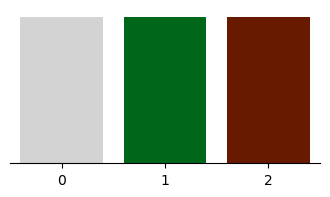

In [140]:
grey= '#d3d3d3'
green= '#00671a'
red= '#671a00'

fig, ax = plt.subplots(figsize=(4, 2))

ax.bar(0, 1, color= grey)
ax.bar(1, 1, color= green)
ax.bar(2, 1, color= red)

ax.set_yticks([])
ax.set_ylabel('')

ax.set_xlim(-0.5, 2.5)
ax.set_xticks([0, 1, 2])

ax.spines[['top', 'left', 'right']].set_visible(False)

plt.show()

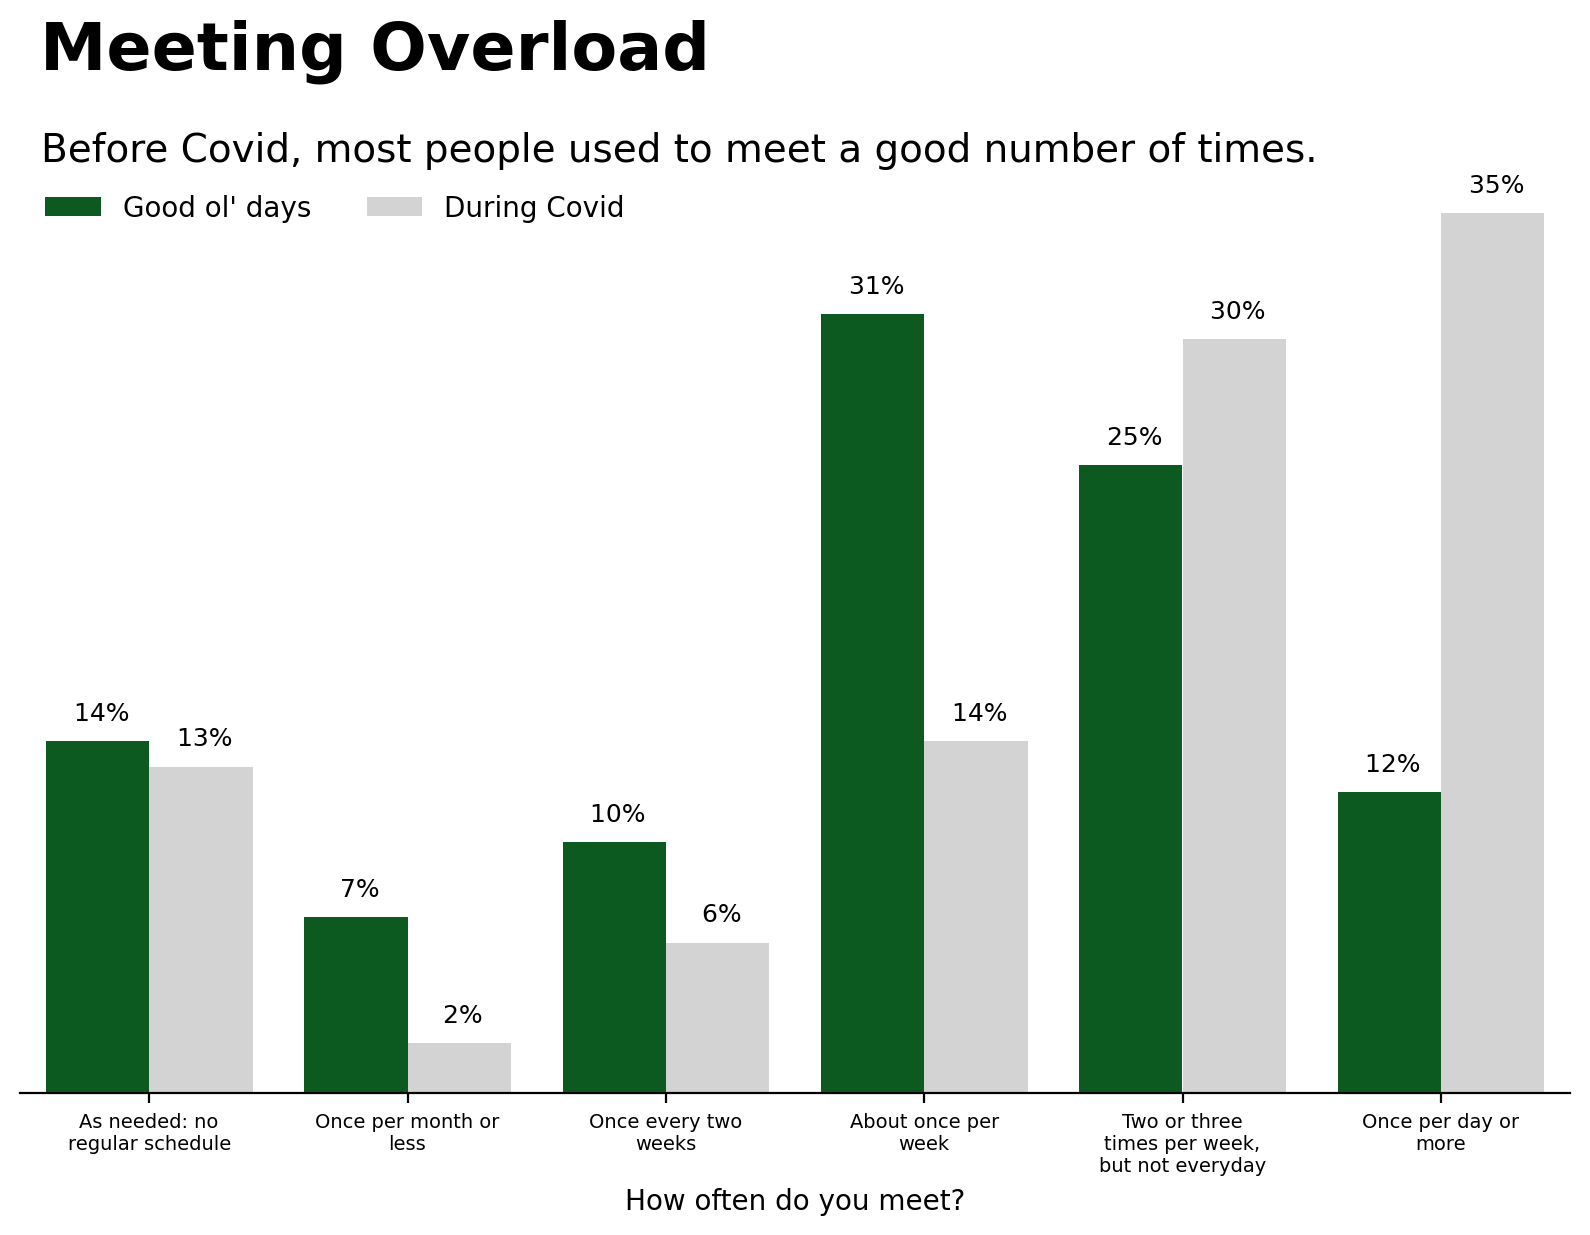

In [143]:
plot_bar(
    title= 'Before Covid, most people used to meet a good number of times.',
    palette= [green, grey]
)

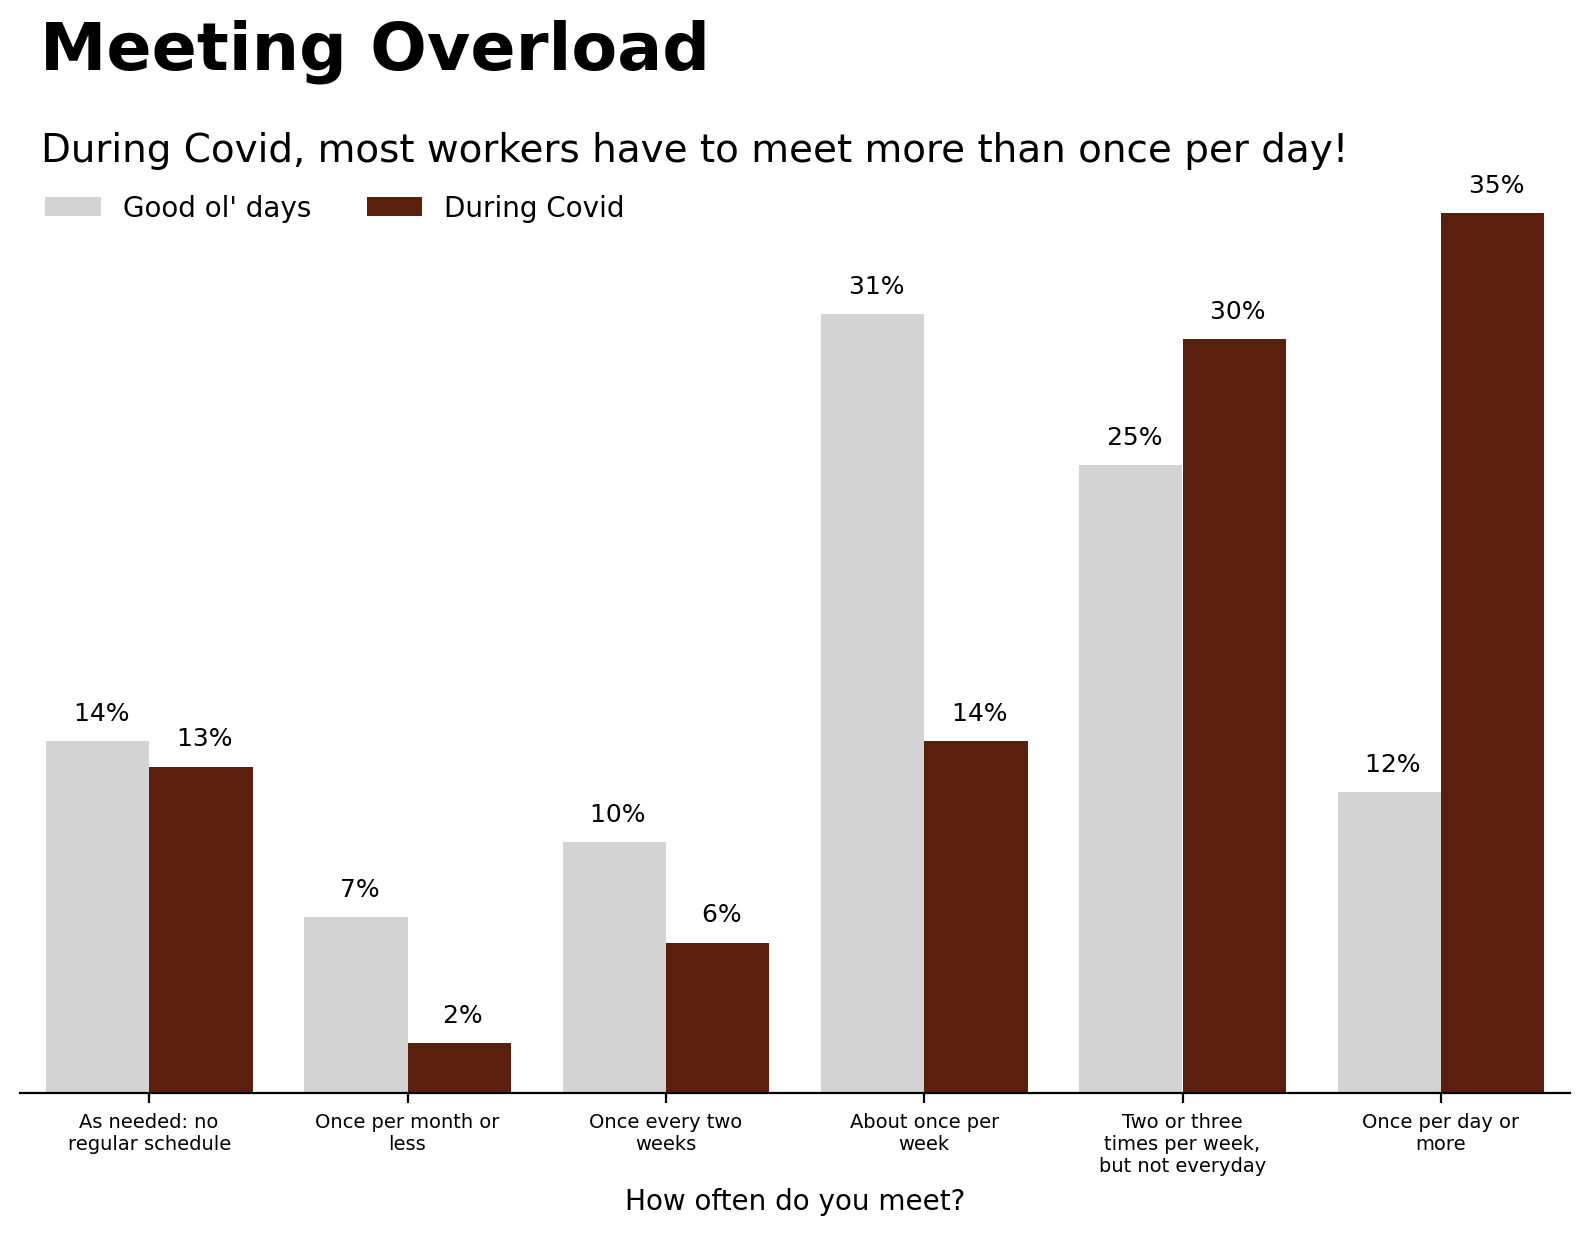

In [142]:
plot_bar(
    title= 'During Covid, most workers have to meet more than once per day!',
    palette= [grey, red]
)